In [2]:
import pandas as pd 
import numpy as np 


import matplotlib.pyplot as plt 
plt.style.use('dark_background')

import seaborn as sns 
import os
plt.rcParams.update({
    "figure.figsize" : (12,8),
    "axes.grid" : True
})


In [3]:
df = pd.read_csv(os.path.join(os.getcwd(),"data","real_estate.csv"))

In [4]:
df.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


37.98019323671498 38.45 24.7


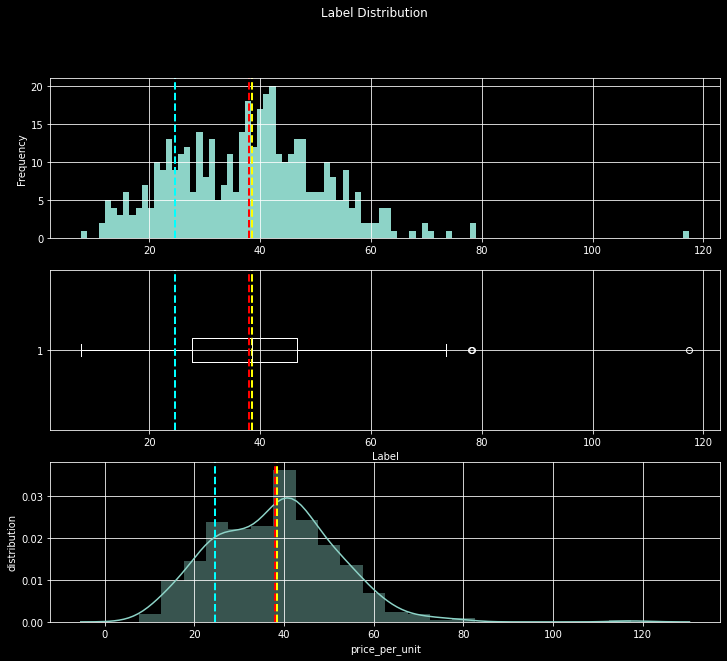

In [6]:
target = df['price_per_unit']
meanValue = target.mean()
medianValue = target.median()
modeValue = target.mode()[0]

print(meanValue,medianValue,modeValue)

fig,ax = plt.subplots(3,1,figsize=(12,10))


ax[0].hist(target,bins=100)
ax[0].set_ylabel("Frequency")

ax[0].axvline(meanValue,color='red',linestyle='dashed', linewidth=2)
ax[0].axvline(medianValue,color='yellow',linestyle='dashed', linewidth=2)
ax[0].axvline(modeValue,color='cyan',linestyle='dashed', linewidth=2)


ax[1].boxplot(target, vert=False)
ax[1].set_xlabel('Label')
ax[1].axvline(meanValue,color='red',linestyle='dashed', linewidth=2)
ax[1].axvline(medianValue,color='yellow',linestyle='dashed', linewidth=2)
ax[1].axvline(modeValue,color='cyan',linestyle='dashed', linewidth=2)


sns.distplot(target,kde=True,hist=True)
ax[2].set_ylabel('distribution')
ax[2].axvline(meanValue,color='red',linestyle='dashed', linewidth=2)
ax[2].axvline(medianValue,color='yellow',linestyle='dashed', linewidth=2)
ax[2].axvline(modeValue,color='cyan',linestyle='dashed', linewidth=2)


fig.suptitle('Label Distribution')
fig.show()


## Removing outliers 

37.341421568627446 38.25 24.7


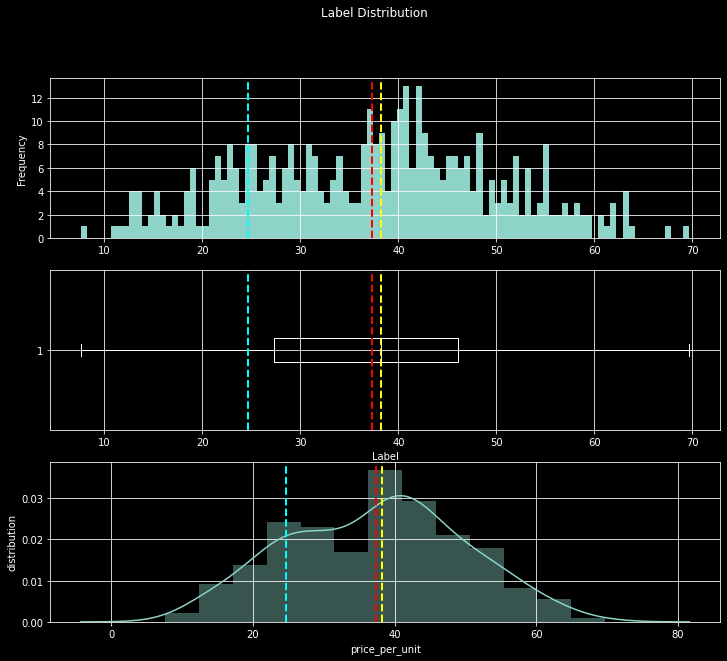

In [7]:
target = df['price_per_unit'][df["price_per_unit"] < 70]
meanValue = target.mean()
medianValue = target.median()
modeValue = target.mode()[0]

print(meanValue,medianValue,modeValue)

fig,ax = plt.subplots(3,1,figsize=(12,10))


ax[0].hist(target,bins=100)
ax[0].set_ylabel("Frequency")

ax[0].axvline(meanValue,color='red',linestyle='dashed', linewidth=2)
ax[0].axvline(medianValue,color='yellow',linestyle='dashed', linewidth=2)
ax[0].axvline(modeValue,color='cyan',linestyle='dashed', linewidth=2)


ax[1].boxplot(target, vert=False)
ax[1].set_xlabel('Label')
ax[1].axvline(meanValue,color='red',linestyle='dashed', linewidth=2)
ax[1].axvline(medianValue,color='yellow',linestyle='dashed', linewidth=2)
ax[1].axvline(modeValue,color='cyan',linestyle='dashed', linewidth=2)


sns.distplot(target,kde=True,hist=True)
ax[2].set_ylabel('distribution')
ax[2].axvline(meanValue,color='red',linestyle='dashed', linewidth=2)
ax[2].axvline(medianValue,color='yellow',linestyle='dashed', linewidth=2)
ax[2].axvline(modeValue,color='cyan',linestyle='dashed', linewidth=2)


fig.suptitle('Label Distribution')
fig.show()


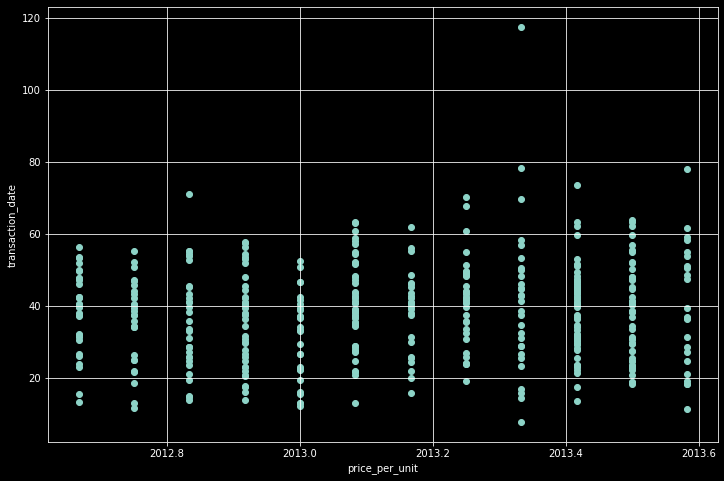

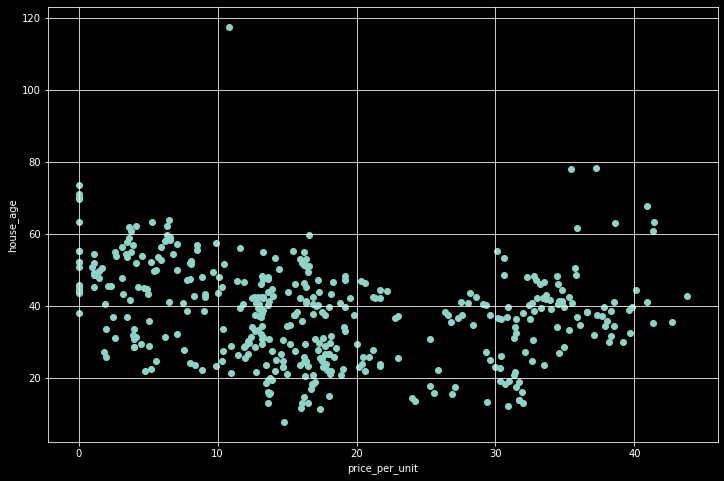

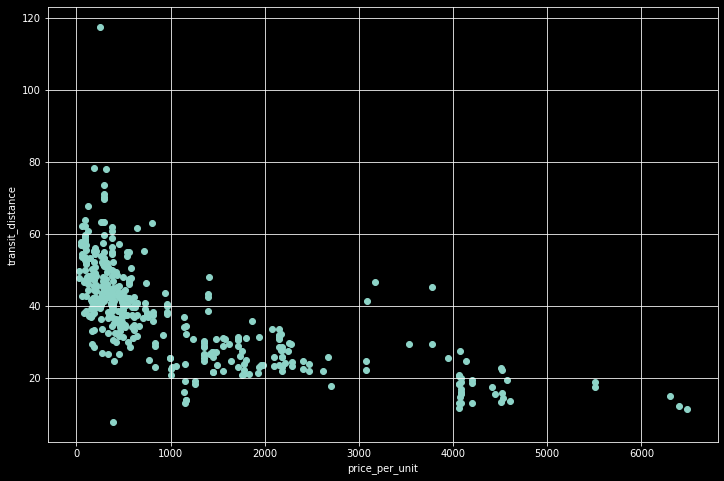

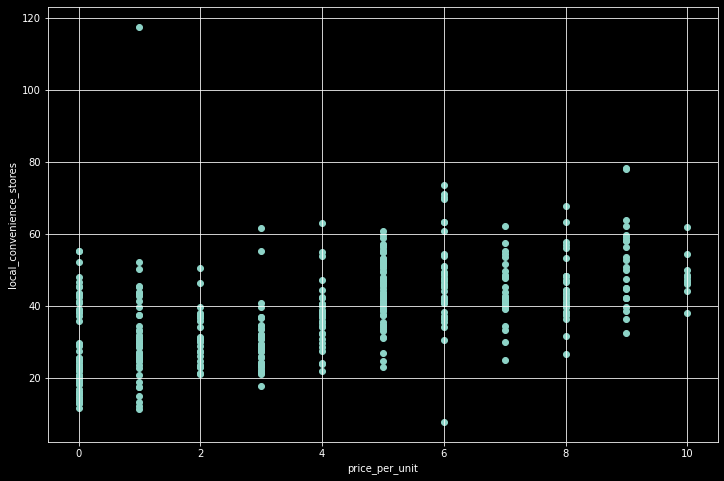

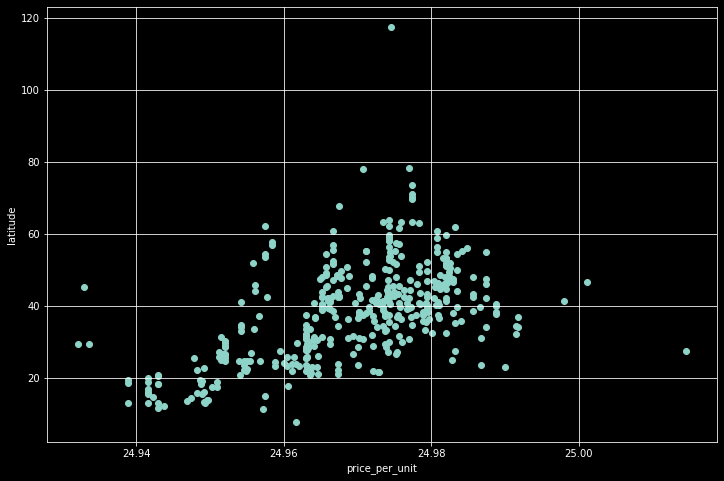

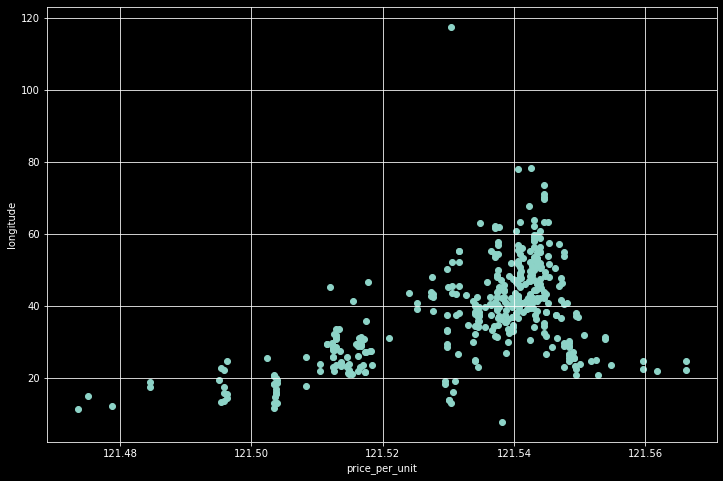

In [8]:
cols = df.columns
for col in cols[:-1]:
    plt.scatter(df[col],df['price_per_unit'])
    plt.xlabel('price_per_unit')
    plt.ylabel(col)
    plt.show()

- looks like `transaction_Date` and `local_convenience_stores` are categorical/ discrete 


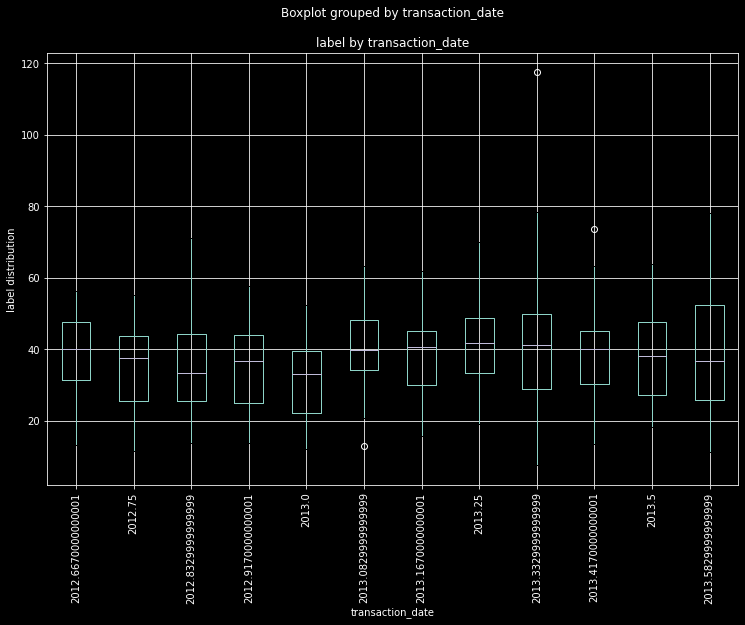

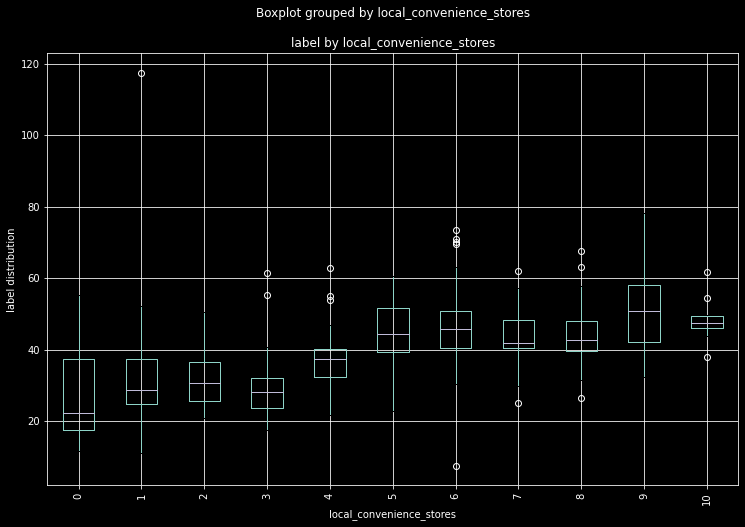

In [9]:
for col in df[['transaction_date','local_convenience_stores']]:
    fig = plt.figure()

    ax = fig.gca()
    df.boxplot(column="price_per_unit",by=col,ax=ax)
    plt.xticks(rotation='vertical')
    ax.set_title("label by "+col)
    ax.set_ylabel("label distribution")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

X, y = df[df.columns[:-1]].values, df[df.columns[-1]].values

In [11]:
X.shape

(414, 6)

In [12]:
y.shape

(414,)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,random_state=0,test_size=0.30)

In [14]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((289, 6), (125, 6), (289,), (125,))

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np 


In [16]:
numeric_features_indeces = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scale',StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features_indeces)
    ]
)

pipeline = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('regressor',RandomForestRegressor(1000))
    ]
)

model = pipeline.fit(xtrain,ytrain)

print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor(n_estimators=1000))])


In [17]:
from sklearn.metrics import r2_score,mean_squared_error

predictions = model.predict(xtest)

mse = mean_squared_error(ytest,predictions)
r2score = r2_score(ytest,predictions)
print(f"""

MEAN SQUARED ERROR      : {mse}
ROOT MEAN SQUARED ERROR : {np.sqrt(mse)}
R2 SCORE                : {r2score}

""")



MEAN SQUARED ERROR      : 75.54637423354441
ROOT MEAN SQUARED ERROR : 8.691741726118213
R2 SCORE                : 0.5567157504936363




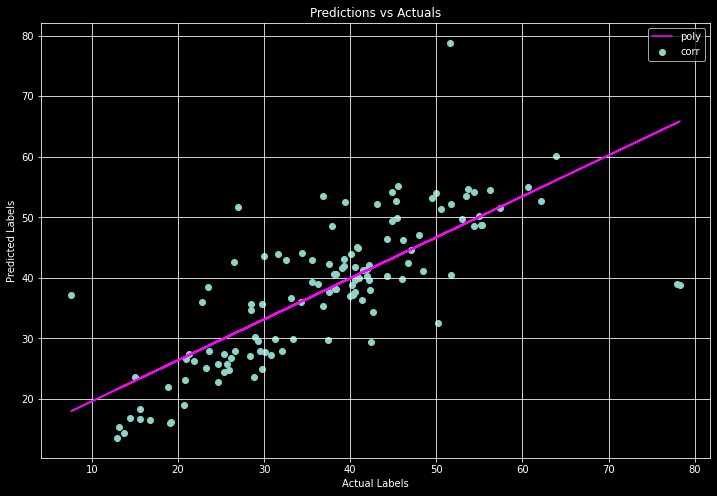

In [18]:
plt.scatter(ytest, predictions,label="corr")
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(ytest, predictions, 1)
p = np.poly1d(z)
plt.plot(ytest,p(ytest), color='magenta',label="poly")
plt.legend(loc="best")

plt.show()

In [19]:
import joblib 

joblib.dump(model,"./realestate_regression_model.pkl")

['./realestate_regression_model.pkl']